# Harris Corner Detection

### Import Resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Displaying the image

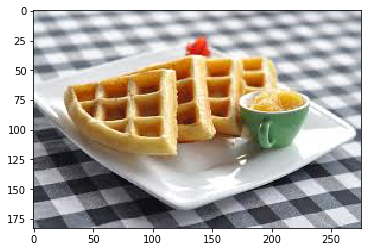

In [2]:
# Read in the image
image = cv2.imread('images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy);

### Detect corners

**Harris Corner Detector Parameters**
- `Grayscale Float Values`
- `Neighbourhood Size`: 2 refers to 2*2 pixel square window
- `Size of Sobel Operator`
- `Corner Size`

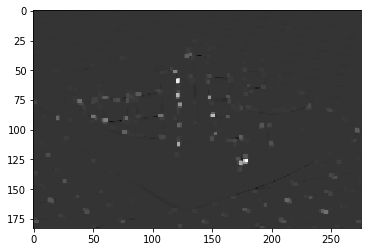

In [24]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.05)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray');

### Extract and display strong corners

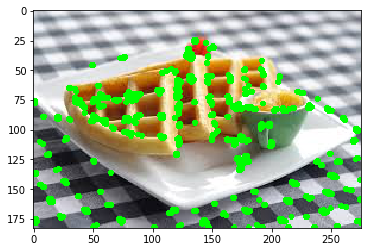

In [30]:
# Defining a threshold for extracting strong corners
thresh = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Drawing corners on the image
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center, radius, color, thickness
            cv2.circle(corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image);

Changing the threshold results in detection of more or less strong corner points.